In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
brain_mri = nib.load('../datasets/preprocessing/IXI662-Guys-1120-T1.nii.gz')
brain_mri_data = brain_mri.get_fdata()
brain_mri.shape

(256, 256, 150)

In [3]:
affine = brain_mri.affine
shape = brain_mri.shape
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [4]:
# Last row and Last column together is called the offset
print(affine[-1]) # last row
print(affine[:,-1]) # last column

[0. 0. 0. 1.]
[ -90.67985535  102.82944489 -114.82378387    1.        ]


In [5]:
# 3x3 defines the scaling, rotation and shering parameters
affine[:-1,:-1]

array([[ 1.89821944e-02, -2.72075552e-03,  1.19975281e+00],
       [-9.27821696e-01,  1.32986516e-01,  2.45456006e-02],
       [ 1.33014351e-01,  9.28015888e-01,  5.71511449e-11]])

In [31]:
# Volume covered by voxel (volumne pixel), Units are in mm
print(brain_mri.header.get_zooms())
print(f"Volume of each voxel: {np.prod(brain_mri.header.get_zooms()):.4f} mm^3")

(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))
Volume of each voxel: 1.0547 mm^3


In [7]:
# Fetch orientation
# P - Moves from Anterior to Posterior
# S - Moves from Inferior to Superior
# R - Moves from Left to Right
nib.aff2axcodes(affine)

('P', 'S', 'R')

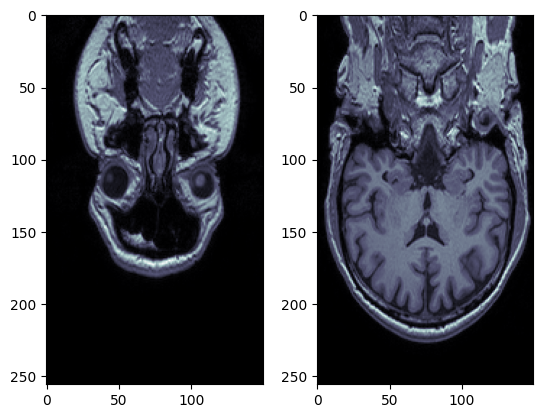

In [75]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[40,:,:], cmap='bone')
axis[1].imshow(brain_mri_data[120,:,:], cmap='bone')

In [74]:
# Code to animate
# from matplotlib.animation import FuncAnimation

# # Define the figure and axis
# fig, ax = plt.subplots()

# # Display the first slice initially
# slice_index = 0
# img = ax.imshow(brain_mri_data[:, :, slice_index], cmap='gray')

# # Define the update function for the animation
# def updateImg(slice_index):
#     ax.set_title(f'Slice {slice_index}')
#     img.set_data(brain_mri_data[:, :, slice_index])
#     return img,

# # Create an animation: we can show all slices along the z-axis
# anim = FuncAnimation(fig, updateImg, frames=brain_mri_data.shape[2], interval=200, blit=False)
# # Save the animation as a GIF
# anim.save('R_mri_animation.gif', writer='imagemagick', fps=60)


MovieWriter imagemagick unavailable; using Pillow instead.
